In [26]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import plotly.io as pio
#pio.renderers.default = "browser"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.regression.quantile_regression import QuantReg

In [27]:
df = pd.read_csv("insurance.csv") 

In [28]:
df.shape

(1338, 7)

In [29]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [30]:
print(df.isnull().sum())  # Yayi Data doesnt have null values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# MLR with Regression Planes: Charges vs Age, BMI & Smoking

In [42]:
import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd
import numpy as np

mlr_data = df[['age', 'bmi', 'smoker', 'charges']].copy()
mlr_data['smoker_yes'] = (mlr_data['smoker'] == 'yes').astype(int)
X = mlr_data[['age', 'bmi', 'smoker_yes']]
X = sm.add_constant(X)
y = mlr_data['charges']
mlr_model = sm.OLS(y, X).fit()

fig = go.Figure()

non_smokers = df[df['smoker'] == 'no']
fig.add_trace(go.Scatter3d(
    x=non_smokers['age'],
    y=non_smokers['bmi'],
    z=non_smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.7),
    name='Non-smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

smokers = df[df['smoker'] == 'yes']
fig.add_trace(go.Scatter3d(
    x=smokers['age'],
    y=smokers['bmi'],
    z=smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.7),
    name='Smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

age_range = np.linspace(df['age'].min(), df['age'].max(), 20)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 20)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)

smoker_0 = np.zeros_like(age_grid.flatten())
X_pred_nonsmoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),                
    bmi_grid.flatten(),               
    smoker_0                           
])
z_pred_nonsmoker = mlr_model.predict(X_pred_nonsmoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_nonsmoker,
    colorscale='Blues', opacity=0.3,
    name='Non-smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

smoker_1 = np.ones_like(age_grid.flatten())
X_pred_smoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),              
    bmi_grid.flatten(),               
    smoker_1                           
])
z_pred_smoker = mlr_model.predict(X_pred_smoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_smoker,
    colorscale='Reds', opacity=0.3,
    name='Smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

fig.update_layout(
    title=f'MLR with Regression Planes: Charges vs Age, BMI & Smoking ',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Charges ($)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=900, height=700,
    
    legend=dict(
        x=0.02,  
        y=0.98,  
        bgcolor="rgba(255,255,255,0.8)",  
        bordercolor="rgba(0,0,0,0.5)",   
        borderwidth=1,
        font=dict(size=16),  
        itemsizing="constant",  
        itemwidth=40,  
        tracegroupgap=10  
    )
)

fig.show()



In [43]:
print(f"MLR Model Summary:")
print(f"R-squared: {mlr_model.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_model.rsquared_adj:.4f}")
print("\nCoefficients:")
print(f"Intercept: ${mlr_model.params[0]:,.2f}")
print(f"Age: ${mlr_model.params[1]:,.2f} per year")
print(f"BMI: ${mlr_model.params[2]:,.2f} per unit")
print(f"Smoker: ${mlr_model.params[3]:,.2f} (smoker vs non-smoker)")

MLR Model Summary:
R-squared: 0.7475
Adjusted R-squared: 0.7469

Coefficients:
Intercept: $-11,676.83
Age: $259.55 per year
BMI: $322.62 per unit
Smoker: $23,823.68 (smoker vs non-smoker)


/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/2661828093.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/2661828093.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/2661828093.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipy

## Quantile Regression

In [44]:

import plotly.graph_objects as go
from statsmodels.regression.quantile_regression import QuantReg

age_grid, bmi_grid = np.meshgrid(np.linspace(df['age'].min(), df['age'].max(), 15),
                                 np.linspace(df['bmi'].min(), df['bmi'].max(), 15))
quantiles = np.arange(0.05, 0.96, 0.05)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df[df['smoker']=='no']['age'], y=df[df['smoker']=='no']['bmi'], 
                          z=df[df['smoker']=='no']['charges'], mode='markers', 
                          marker=dict(size=3, color='blue', opacity=0.6), name='Non-smokers'))
fig.add_trace(go.Scatter3d(x=df[df['smoker']=='yes']['age'], y=df[df['smoker']=='yes']['bmi'], 
                          z=df[df['smoker']=='yes']['charges'], mode='markers', 
                          marker=dict(size=3, color='red', opacity=0.6), name='Smokers'))

frames = []
for q in quantiles:
    qr = QuantReg(y, X).fit(q=q)

    z_ns = qr.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                      bmi_grid.flatten(), np.zeros(age_grid.size)])).reshape(age_grid.shape)
    z_s = qr.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                     bmi_grid.flatten(), np.ones(age_grid.size)])).reshape(age_grid.shape)
    
    frames.append(go.Frame(data=[
        go.Scatter3d(x=df[df['smoker']=='no']['age'], y=df[df['smoker']=='no']['bmi'], 
                    z=df[df['smoker']=='no']['charges'], mode='markers', 
                    marker=dict(size=3, color='blue', opacity=0.6), name='Non-smokers'),
        go.Scatter3d(x=df[df['smoker']=='yes']['age'], y=df[df['smoker']=='yes']['bmi'], 
                    z=df[df['smoker']=='yes']['charges'], mode='markers', 
                    marker=dict(size=3, color='red', opacity=0.6), name='Smokers'),
        go.Surface(x=age_grid, y=bmi_grid, z=z_ns, colorscale='Blues', opacity=0.5, 
                  name=f'Non-smoker τ={q:.2f}', showscale=False),
        go.Surface(x=age_grid, y=bmi_grid, z=z_s, colorscale='Reds', opacity=0.5, 
                  name=f'Smoker τ={q:.2f}', showscale=False)
    ], name=str(q)))

qr_init = QuantReg(y, X).fit(q=0.5)
z_ns_init = qr_init.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                            bmi_grid.flatten(), np.zeros(age_grid.size)])).reshape(age_grid.shape)
z_s_init = qr_init.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                           bmi_grid.flatten(), np.ones(age_grid.size)])).reshape(age_grid.shape)

fig.add_trace(go.Surface(x=age_grid, y=bmi_grid, z=z_ns_init, colorscale='Blues', 
                        opacity=0.5, name='Non-smoker τ=0.5', showscale=False))
fig.add_trace(go.Surface(x=age_grid, y=bmi_grid, z=z_s_init, colorscale='Reds', 
                        opacity=0.5, name='Smoker τ=0.5', showscale=False))

fig.frames = frames
fig.update_layout(
    title=' Quantile Regression',
    scene=dict(xaxis_title='Age', yaxis_title='BMI', zaxis_title='Charges ($)',
               camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))),
    width=900, height=700,
    # Added same legend style as MLR
    legend=dict(
        x=0.02,  
        y=0.98,  
        bgcolor="rgba(255,255,255,0.8)",  
        bordercolor="rgba(0,0,0,0.5)",   
        borderwidth=1,
        font=dict(size=16),  
        itemsizing="constant",  
        itemwidth=40,  
        tracegroupgap=10  
    ),
    sliders=[{
        'active': 9, 'currentvalue': {'prefix': 'Quantile (τ): '}, 'pad': {'t': 50},
        'steps': [{'args': [[q], {'frame': {'duration': 300, 'redraw': True}}], 
                  'label': f'{q:.2f}', 'method': 'animate'} for q in quantiles]
    }]
)

fig.show()


/opt/anaconda3/envs/msds692/lib/python3.13/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



# 2D analysis of Quantile Regression

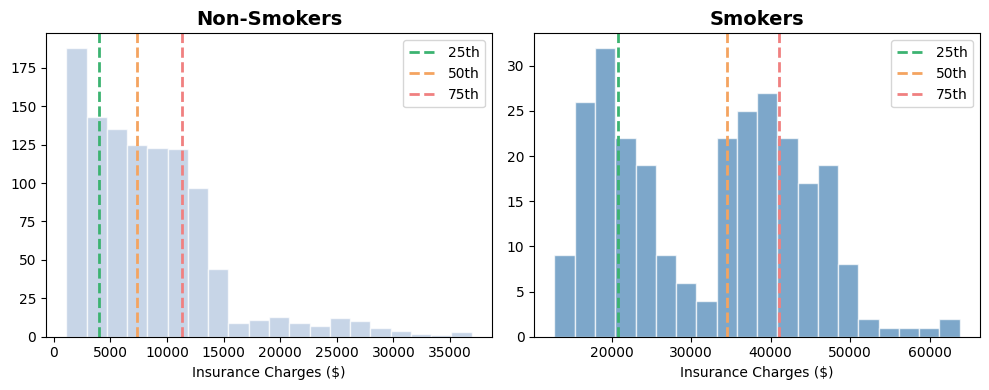

Non-smokers: $3,986  $7,345 $11,363
Smokers:     $20,826  $34,456  $41,019
 Smoker range (20,193) is 2.7x larger than non-smoker range (7,376)


In [40]:

import matplotlib.pyplot as plt

nonsmoker = df[df['smoker'] == 'no']['charges']
smoker = df[df['smoker'] == 'yes']['charges']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(nonsmoker, bins=20, color='lightsteelblue', alpha=0.7, edgecolor='white')
ax1.axvline(nonsmoker.quantile(0.25), color='mediumseagreen', linestyle='--', linewidth=2, label='25th')
ax1.axvline(nonsmoker.quantile(0.5), color='sandybrown', linestyle='--', linewidth=2, label='50th')
ax1.axvline(nonsmoker.quantile(0.75), color='lightcoral', linestyle='--', linewidth=2, label='75th')
ax1.set_title('Non-Smokers', fontsize=14, fontweight='bold')
ax1.set_xlabel('Insurance Charges ($)')
ax1.legend()

ax2.hist(smoker, bins=20, color='steelblue', alpha=0.7, edgecolor='white')
ax2.axvline(smoker.quantile(0.25), color='mediumseagreen', linestyle='--', linewidth=2, label='25th')
ax2.axvline(smoker.quantile(0.5), color='sandybrown', linestyle='--', linewidth=2, label='50th')
ax2.axvline(smoker.quantile(0.75), color='lightcoral', linestyle='--', linewidth=2, label='75th')
ax2.set_title('Smokers', fontsize=14, fontweight='bold')
ax2.set_xlabel('Insurance Charges ($)')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Non-smokers: ${nonsmoker.quantile(0.25):,.0f}  ${nonsmoker.quantile(0.5):,.0f} ${nonsmoker.quantile(0.75):,.0f}")
print(f"Smokers:     ${smoker.quantile(0.25):,.0f}  ${smoker.quantile(0.5):,.0f}  ${smoker.quantile(0.75):,.0f}")

ns_range = nonsmoker.quantile(0.75) - nonsmoker.quantile(0.25)
s_range = smoker.quantile(0.75) - smoker.quantile(0.25)
print(f" Smoker range ({s_range:,.0f}) is {s_range/ns_range:.1f}x larger than non-smoker range ({ns_range:,.0f})")